In [2]:
import numpy as np
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [3]:
air = ml.Non_Dispersion(1)
LOCA = ml.Non_Dispersion(1.405)
sodalime = ml.open_material('sodalime', 'Material')
OC = ml.open_material('OC_LENS', 'Material')
OC_HRI = ml.open_material('OC_HRI_LENS', 'Material')
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
SiN = ml.open_material('SiN_LENS', 'Sellmeier')

In [4]:
wl = np.linspace(400, 700, 301)
wl1 = np.linspace(400, 450, 51)
wl2 = np.linspace(450, 700, 251)

bridge_11 = lambda th:tm.Design(
    [LOCA,OC,SiN,SiO2,ITO,OC,ITO,SiO2,SiN,sodalime],
    [None, th['acr']-th['oc'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl)
diamond_11 = lambda th: tm.Design(
    [LOCA,OC,SiN,SiO2,ITO,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl)
trace_11 = lambda th: tm.Design(
    [LOCA,OC,SiN,SiO2,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl)

bridge_12 = lambda th:tm.Design(
    [LOCA,OC,SiN,SiO2,ITO,OC,ITO,SiO2,SiN,sodalime],
    [None, th['acr']-th['oc'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
diamond_12 = lambda th: tm.Design(
    [LOCA,OC,SiN,SiO2,ITO,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
trace_12 = lambda th: tm.Design(
    [LOCA,OC,SiN,SiO2,SiO2,SiN,sodalime],
    [None, th['acr'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)

delta_d_b_11 = lambda th: sum(abs(diamond_11(th)-bridge_11(th)))
delta_d_t_11 = lambda th: sum(abs(diamond_11(th)-trace_11(th)))
delta_d_b_12 = lambda th: sum(abs(diamond_12(th)-bridge_12(th)))
delta_d_t_12 = lambda th: sum(abs(diamond_12(th)-trace_12(th)))

def th(tht):
    th = {}
    th['acr'] = tht[0]
    th['t_sin'] = tht[1]
    th['t_sio2'] = tht[2]
    th['b_ito'] = tht[3]
    th['oc'] = tht[4]
    th['ito'] = tht[5]
    th['b_sio2'] = tht[6]
    th['b_sin'] = tht[7]
    return th
fom = lambda tht: delta_d_t_11(th(tht))+delta_d_b_11(th(tht))#+delta_d_b_12(th(tht))+delta_d_t_12(th(tht))

In [6]:
res = differential_evolution(
    fom, [
        (1500,2200),(0,100),(0,100),(20,30),(1200,1201),(20,120),(0,100),(0,100)
    ]
)

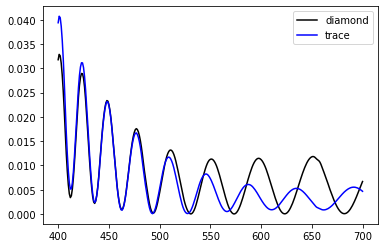

In [36]:
#print(res.x)
f1 = [2200,9.03100877,48.17005464,20.,1201.,120.,28.92432132,12.91735593]
te = th(f1)
plt.plot(wl, diamond_11(te), 'k-', label = 'diamond')
#plt.plot(wl, bridge_11(te), 'r-', label = 'bridge')
plt.plot(wl, trace_11(te), 'b-', label = 'trace')
#plt.plot(wl2, diamond_12(te), 'k-')
#plt.plot(wl2, bridge_12(te), 'r-')
#plt.plot(wl2, trace_12(te), 'b-')
plt.legend(loc = 'best')
#plt.savefig('test2.png')
plt.show()

In [5]:
fit_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0]-th[4], th[1], th[2], th[3], th[4], th[5], th[6], th[7], None]
)

fit_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[5], th[6], th[7], None]
)

fit_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2,SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[6], th[7], None]
)

plt.plot(wl, fit_bri(res.x).reflectance(wl), '-r')
plt.plot(wl, fit_dia(res.x).reflectance(wl), '-k')
plt.plot(wl, fit_tra(res.x).reflectance(wl), '-b')
plt.show()

NameError: name 'res' is not defined

In [6]:
TPK_bridge = tm.Design(
    [LOCA, OC, SiN, SiO2, ITO, OC_HRI, ITO, SiO2, SiN, sodalime],
    [None,1003,23.17,19.73,120,885.68,20,35.1,13.18, None]
)
tm.margin(TPK_bridge,5,wl)

[[0.012741976725894897, 0.01069297378099052, 0.0020490029449043764],
 [0.012430531782080905, 0.010254210023979625, 0.00217632175810128],
 [0.011455384951304007, 0.011059925981754119, 0.00039545896954988786],
 [0.011248078799760405, 0.011175574031483967, 7.250476827643827e-05],
 [0.011259488409485539, 0.011102510672310982, 0.00015697773717455663],
 [0.012085822920429045, 0.011016687653464304, 0.0010691352669647408],
 [0.015049018151516486, 0.008771026821005811, 0.0062779913305106745],
 [0.011276820021412452, 0.011159036911131601, 0.0001177831102808502]]

In [7]:
LENS_bridge = tm.Design(
    [LOCA, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None,2185.46,9.04,47.85,20,1201,120,29.04,12.9, None]
)

tm.margin(LENS_bridge,5,wl)

[[0.009780640561640973, 0.008498871242927216, 0.001281769318713757],
 [0.0089126570432107, 0.008459055946249884, 0.00045360109696081577],
 [0.008960586751260394, 0.008272640530136136, 0.0006879462211242578],
 [0.008555594009884423, 0.008545274321582514, 1.0319688301908478e-05],
 [0.009916998904680844, 0.007856694821535452, 0.0020603040831453923],
 [0.008737006128084795, 0.008545351080588405, 0.0001916550474963894],
 [0.010447477704750185, 0.008278655746269969, 0.0021688219584802167],
 [0.008583485892309417, 0.008515246278673958, 6.82396136354596e-05]]

In [ ]:
bridge_21 = lambda th:tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, OC_LENS, ITO_LENS ,SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr']-th['oc'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)
diamond_21 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'],th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)
trace_21 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, SiN_LENS, SiO2_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl1)

bridge_22 = lambda th:tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, OC_LENS, ITO_LENS ,SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr']-th['oc'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'], th['b_ito'], th['oc'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
diamond_22 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'],th['t_sin'], th['t_sio2'], th['ito'], th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)
trace_22 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, SiN_LENS, SiO2_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th['acr'], th['tt_sin'], th['tt_sio2'], th['t_sin'], th['t_sio2'],th['b_sio2'], th['b_sin'], None]
).reflectance(wl2)

delta_d_b_21 = lambda th: sum(abs(diamond_21(th)-bridge_21(th)))
delta_d_t_21 = lambda th: sum(abs(diamond_21(th)-trace_21(th)))
delta_d_b_22 = lambda th: sum(abs(diamond_22(th)-bridge_22(th)))
delta_d_t_22 = lambda th: sum(abs(diamond_22(th)-trace_22(th)))

def th2(tht):
    th = {}
    th['acr'] = tht[0]
    th['tt_sin'] = tht[1]
    th['tt_sio2'] = tht[2]
    th['t_sin'] = tht[3]
    th['t_sio2'] = tht[4]
    th['b_ito'] = tht[5]
    th['oc'] = tht[6]
    th['ito'] = tht[7]
    th['b_sio2'] = tht[8]
    th['b_sin'] = tht[9]
    return th
fom2 = lambda tht: delta_d_b_21(th2(tht)) + 5*delta_d_t_21(th2(tht)) + delta_d_b_22(th2(tht)) + delta_d_t_22(th2(tht))

In [ ]:
res2 = differential_evolution(
    fom2, [
        (1700,2200),(4,20),(20,80),(4,20),(20,80),(20,120),(1000,1500),(20,26),(20,80),(4,20)
    ]
)

print(res2.x)
te2 = th2(res2.x)
plt.plot(wl1, diamond_21(te2), 'k-', label = 'diamond')
plt.plot(wl1, bridge_21(te2), 'r-', label = 'bridge')
plt.plot(wl1, trace_21(te2), 'b-', label = 'trace')
plt.plot(wl2, diamond_22(te2), 'k-')
plt.plot(wl2, bridge_22(te2), 'r-')
plt.plot(wl2, trace_22(te2), 'b-')
plt.legend(loc = 'best')
plt.show()